# Clustering (and PCA, t-SNE) using only healthy and ALZ. people
healthy: prmdiag = 0
Alzheimer: prmdiag = 2 or 3

# Import Libraries and setup

In [55]:
import os
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage


plt.style.use("ggplot")

drive.mount('/content/drive', force_remount=True)
os.chdir('/content/drive/MyDrive/Colab Notebooks/data_DELCODE')

Mounted at /content/drive


# Load and transform data

In [56]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")


In [57]:
train.head()


,ConnID,Repseudonym,siteid,age,visdat,sex,prmdiag,edyears,MEM_score,Apoe,IDs,1_2,1_3,1_4,1_5,1_6,1_7,1_8,1_9,1_10,1_11,1_12,1_13,1_14,1_15,1_16,1_17,1_18,1_19,1_20,1_21,1_22,1_23,1_24,1_25,1_26,1_27,1_28,1_29,1_30,...,237_243,237_244,237_245,237_246,238_239,238_240,238_241,238_242,238_243,238_244,238_245,238_246,239_240,239_241,239_242,239_243,239_244,239_245,239_246,240_241,240_242,240_243,240_244,240_245,240_246,241_242,241_243,241_244,241_245,241_246,242_243,242_244,242_245,242_246,243_244,243_245,243_246,244_245,244_246,245_246
0,85,3fd91223d,14,63,18.05.2016,1,0,13,1.215577,1.0,85.0,0.749860,0.230923,-0.065474,0.412777,0.303270,0.341117,-0.027277,0.574057,0.290517,0.862302,0.479994,0.419541,0.089797,0.211377,-0.069165,0.243698,0.138934,0.203588,-0.128424,-0.142274,-0.097212,0.342343,-0.006937,0.953543,0.271842,-0.215807,-0.345942,0.288377,-0.002376,...,0.675390,0.641759,0.256006,0.161096,0.051992,0.335806,0.274249,0.464632,0.346927,0.197321,0.093035,0.169661,0.843718,0.758413,0.297913,0.398200,-0.033476,1.027731,1.040865,1.111977,0.796641,0.750172,0.242670,0.693493,0.663318,0.677533,0.545846,0.246136,0.600611,0.532708,0.910899,0.423027,0.168445,0.086235,0.553605,0.260301,0.262766,-0.064755,-0.121692,1.193451
1,11,0f1b4b7ac,11,68,26.10.2017,1,2,13,-0.583224,1.0,11.0,0.769255,0.488714,0.116482,-0.021402,-0.150269,0.307751,0.393959,0.304850,0.355440,0.476269,0.125607,-0.130721,-0.072421,0.430517,0.186178,0.727480,0.388229,0.120676,0.009006,0.496298,0.096529,0.357324,0.193164,0.485271,0.248289,-0.113434,-0.227484,0.485454,0.268980,...,1.170770,0.347485,0.377663,0.224154,0.323828,0.439175,0.538379,0.322498,0.745291,0.248104,0.554985,0.353254,0.220629,0.451341,0.322443,0.568902,0.357294,0.450699,0.659226,0.461063,0.722502,0.556016,0.228903,0.295915,0.322317,0.484691,0.791189,0.268268,0.141795,0.034816,0.381080,0.852528,0.141102,0.182648,0.196211,0.387882,0.299217,0.194711,0.191894,1.018621
2,619,bf5da3838,11,78,22.06.2016,0,1,14,-0.856116,1.0,619.0,0.168419,0.257018,0.016907,0.091702,-0.010532,0.435234,0.106881,0.182423,0.056001,0.502006,0.317397,0.217119,0.021138,0.640308,0.071841,0.204547,0.161851,0.247751,-0.140406,0.114880,-0.060171,0.269094,0.016566,0.430953,0.037941,0.160389,-0.093853,0.430277,-0.035102,...,0.709562,0.446627,0.172218,-0.172940,0.199733,0.216898,0.212193,0.245178,0.138725,0.192206,0.234587,0.136768,0.221140,0.219693,0.082570,0.190661,0.110283,0.411547,0.318120,0.673747,0.659346,0.442534,0.396549,0.123856,0.012965,0.577570,0.563080,0.140217,0.097882,-0.028234,0.639703,0.427146,0.088723,-0.245473,0.663036,0.142216,-0.300101,0.115183,-0.298258,0.131574
3,252,47e5a2600,2,63,28.11.2016,1,1,17,0.862633,0.0,252.0,0.868713,0.325486,0.395653,0.391204,0.349502,0.079478,0.199210,0.158742,-0.060597,0.801271,0.418965,0.180624,0.031938,0.310969,0.231340,0.663267,0.339705,0.427437,0.265302,0.042056,0.125814,0.487544,0.190261,0.516608,0.238371,0.118187,0.057087,0.064976,0.018432,...,0.695289,0.720458,0.383823,0.223196,0.268081,0.140685,0.303392,0.211814,0.215745,0.049197,0.347162,0.521063,0.218042,0.429776,0.175440,0.284785,-0.061578,0.478259,0.531669,0.544807,0.729218,0.118570,-0.128986,0.300403,0.406977,0.579221,0.414116,0.185960,0.494446,0.406204,0.331876,0.222091,0.354670,0.261393,0.797265,0.431262,0.195765,0.176242,-0.108549,0.525855
4,872,48387a07e,8,79,2015-08-31,1,3,11,-2.116266,1.0,872.0,0.128000,0.545008,-0.343972,0.862140,-0.015617,0.179164,-0.233017,0.034938,-0.105519,0.733050,0.088092,0.277305,-0.179329,0.332651,-0.231090,0.702441,-0.072943,0.645076,-0.215037,0.274248,-0.451468,0.574711,-0.173056,0.595247,-0.396143,0.378200,-0.196846,0.674376,-0.166660,...,0.301599,0.281604,-0.257081,0.164976,-0.064623,0.205962,0.259190,0.369864,0.119939,0.430113,-0.128200,0.036388,-0.062767,0.013018,0.002274,0.071944,0.069917,0.173637,0.107760,0.456734,0.444816,0.072618,0.086900,-0.095910,0.172357,0.220310,0.484933,0.004595,-0.263606,-0.013920,0.155383,0.416782,-0.300804,0.057657,0.031142,-0.086161,0.055487,-0.082463,-0.0298

In [58]:
test.head()

,ConnID,Repseudonym,siteid,age,visdat,sex,prmdiag,edyears,MEM_score,Apoe,IDs,1_2,1_3,1_4,1_5,1_6,1_7,1_8,1_9,1_10,1_11,1_12,1_13,1_14,1_15,1_16,1_17,1_18,1_19,1_20,1_21,1_22,1_23,1_24,1_25,1_26,1_27,1_28,1_29,1_30,...,237_243,237_244,237_245,237_246,238_239,238_240,238_241,238_242,238_243,238_244,238_245,238_246,239_240,239_241,239_242,239_243,239_244,239_245,239_246,240_241,240_242,240_243,240_244,240_245,240_246,241_242,241_243,241_244,241_245,241_246,242_243,242_244,242_245,242_246,243_244,243_245,243_246,244_245,244_246,245_246
0,868,6829e1ce3,10,71,2015-01-26,2,3,16,-1.729994,1.0,868.0,1.146729,0.522587,0.299638,0.549717,0.073312,0.446971,0.012572,0.603935,0.515467,0.932092,0.583021,0.171392,-0.144495,-0.024442,-0.154272,0.712633,0.251251,0.240397,-0.052765,0.386807,0.228755,0.298525,0.221253,1.410941,0.474349,0.086748,0.237207,0.782228,0.296881,...,0.351774,0.511471,0.285011,0.270964,0.300079,0.243370,0.258913,0.261387,0.046223,0.189416,0.380844,0.385093,0.527842,0.512310,0.552118,0.450334,0.314042,0.155607,0.164104,0.277321,0.763092,0.408995,0.353857,-0.039462,-0.050630,0.585805,0.494930,0.147964,0.142526,-0.063525,0.747366,0.400368,-0.087084,-0.167530,0.879731,-0.252925,-0.231639,-0.138693,-0.027045,0.388247
1,441,8522b0508,2,67,21.10.2014,1,0,16,1.158892,1.0,441.0,0.199663,0.610013,-0.066466,0.349376,0.076821,0.208840,-0.262101,0.251783,0.211163,0.502968,0.207629,0.394165,0.220473,0.123993,-0.243632,0.552812,0.049304,-0.000104,-0.295398,-0.166069,-0.178240,0.405269,0.093878,0.658632,-0.157273,-0.017449,-0.041605,0.469527,-0.155139,...,0.568286,0.587661,0.183287,0.223735,0.130710,0.166708,0.359447,0.452511,0.340619,0.426335,0.069407,0.105798,0.426328,0.282587,0.205381,0.334163,-0.105860,0.547087,0.732076,0.466669,0.774426,0.387074,0.279595,0.339490,0.642812,0.525380,0.845305,0.514832,0.259368,0.347379,0.496284,0.486426,0.242803,0.254150,0.619526,0.272887,0.358726,0.032463,0.061394,0.616225
2,344,278d3e09d,8,65,11.09.2017,0,2,13,-0.551006,1.0,344.0,0.725238,0.426898,0.360894,0.397894,0.256171,0.386240,0.287945,0.371946,0.271444,0.609089,0.498072,0.465709,0.396935,0.336638,0.446888,0.531004,0.389180,0.377135,0.363941,0.571994,0.364167,0.417144,0.246004,0.516343,0.338453,0.069048,0.216679,0.159632,0.384338,...,0.155720,0.567304,-0.004329,0.017256,0.063996,0.074868,0.256378,0.301886,0.180127,0.111256,-0.155415,-0.101298,0.141372,0.379444,-0.019284,0.072540,-0.186382,0.199278,0.417957,0.093033,0.441952,0.149979,0.208389,0.309599,0.440471,0.292920,0.381183,-0.173404,-0.034664,-0.018565,0.623140,0.499137,0.129084,0.047080,0.387393,-0.007641,0.035944,0.172719,0.116450,0.835336
3,739,e082ef075,10,73,19.10.2017,0,1,15,0.065046,0.0,739.0,0.869575,0.559593,0.257733,0.073006,0.082113,0.381939,0.371169,0.294993,0.386934,0.532553,0.449445,-0.205010,-0.239771,0.455469,0.453030,0.448847,0.264279,0.055732,0.076631,0.338998,0.139095,0.570759,0.290608,0.591161,0.232670,-0.378361,-0.021351,-0.019480,0.040730,...,0.739715,0.696475,0.096738,0.061929,0.030234,0.570444,0.710507,0.727654,0.669247,0.624993,0.029718,0.028448,0.388798,0.331263,0.181484,0.231469,-0.077557,0.505848,0.542434,0.554592,0.730163,0.717702,0.451304,0.104766,0.353524,0.938313,0.585477,0.233315,-0.033772,0.010233,0.736154,0.569162,-0.119822,-0.006025,0.557559,-0.116897,-0.013115,0.108947,0.054055,0.560809
4,788,f71815317,10,68,23.03.2015,1,0,18,0.746486,1.0,788.0,0.441515,0.386490,-0.026574,0.261981,0.058682,0.529303,0.489445,0.249773,0.230496,0.483261,0.222630,0.437510,0.109644,0.056770,-0.024151,0.468324,-0.045324,0.228089,0.026241,0.296034,0.027189,0.339351,0.031207,0.528243,0.138107,0.161225,-0.218060,0.422676,-0.077393,...,0.519957,0.316054,0.159369,0.163482,0.217169,0.311668,0.339225,0.221511,0.103218,0.326568,0.152667,0.141363,0.100861,0.176335,0.059848,0.209259,0.286097,0.011010,0.112836,0.234297,0.524877,0.097849,0.190229,0.045144,0.150050,-0.070643,0.338269,0.071217,-0.283862,-0.029804,0.250007,0.286963,0.099830,0.150341,0.217731,-0.076833,0.167448,0.222248,0.2066

In [59]:
data = pd.concat([train, test])

has_alzheimer = data.prmdiag.isin([2,3])
no_alzheimer = data.prmdiag.isin([0])

data.loc[has_alzheimer, 'target'] = 1
data.loc[no_alzheimer, 'target'] = 0
data.dropna(subset=['target'], axis = 0, inplace = True)

In [60]:
data['prmdiag'].value_counts()

0    218
2    155
3     97
Name: prmdiag, dtype: int64

In [61]:
data.head()

,ConnID,Repseudonym,siteid,age,visdat,sex,prmdiag,edyears,MEM_score,Apoe,IDs,1_2,1_3,1_4,1_5,1_6,1_7,1_8,1_9,1_10,1_11,1_12,1_13,1_14,1_15,1_16,1_17,1_18,1_19,1_20,1_21,1_22,1_23,1_24,1_25,1_26,1_27,1_28,1_29,1_30,...,237_244,237_245,237_246,238_239,238_240,238_241,238_242,238_243,238_244,238_245,238_246,239_240,239_241,239_242,239_243,239_244,239_245,239_246,240_241,240_242,240_243,240_244,240_245,240_246,241_242,241_243,241_244,241_245,241_246,242_243,242_244,242_245,242_246,243_244,243_245,243_246,244_245,244_246,245_246,target
0,85,3fd91223d,14,63,18.05.2016,1,0,13,1.215577,1.0,85.0,0.749860,0.230923,-0.065474,0.412777,0.303270,0.341117,-0.027277,0.574057,0.290517,0.862302,0.479994,0.419541,0.089797,0.211377,-0.069165,0.243698,0.138934,0.203588,-0.128424,-0.142274,-0.097212,0.342343,-0.006937,0.953543,0.271842,-0.215807,-0.345942,0.288377,-0.002376,...,0.641759,0.256006,0.161096,0.051992,0.335806,0.274249,0.464632,0.346927,0.197321,0.093035,0.169661,0.843718,0.758413,0.297913,0.398200,-0.033476,1.027731,1.040865,1.111977,0.796641,0.750172,0.242670,0.693493,0.663318,0.677533,0.545846,0.246136,0.600611,0.532708,0.910899,0.423027,0.168445,0.086235,0.553605,0.260301,0.262766,-0.064755,-0.121692,1.193451,0.0
1,11,0f1b4b7ac,11,68,26.10.2017,1,2,13,-0.583224,1.0,11.0,0.769255,0.488714,0.116482,-0.021402,-0.150269,0.307751,0.393959,0.304850,0.355440,0.476269,0.125607,-0.130721,-0.072421,0.430517,0.186178,0.727480,0.388229,0.120676,0.009006,0.496298,0.096529,0.357324,0.193164,0.485271,0.248289,-0.113434,-0.227484,0.485454,0.268980,...,0.347485,0.377663,0.224154,0.323828,0.439175,0.538379,0.322498,0.745291,0.248104,0.554985,0.353254,0.220629,0.451341,0.322443,0.568902,0.357294,0.450699,0.659226,0.461063,0.722502,0.556016,0.228903,0.295915,0.322317,0.484691,0.791189,0.268268,0.141795,0.034816,0.381080,0.852528,0.141102,0.182648,0.196211,0.387882,0.299217,0.194711,0.191894,1.018621,1.0
4,872,48387a07e,8,79,2015-08-31,1,3,11,-2.116266,1.0,872.0,0.128000,0.545008,-0.343972,0.862140,-0.015617,0.179164,-0.233017,0.034938,-0.105519,0.733050,0.088092,0.277305,-0.179329,0.332651,-0.231090,0.702441,-0.072943,0.645076,-0.215037,0.274248,-0.451468,0.574711,-0.173056,0.595247,-0.396143,0.378200,-0.196846,0.674376,-0.166660,...,0.281604,-0.257081,0.164976,-0.064623,0.205962,0.259190,0.369864,0.119939,0.430113,-0.128200,0.036388,-0.062767,0.013018,0.002274,0.071944,0.069917,0.173637,0.107760,0.456734,0.444816,0.072618,0.086900,-0.095910,0.172357,0.220310,0.484933,0.004595,-0.263606,-0.013920,0.155383,0.416782,-0.300804,0.057657,0.031142,-0.086161,0.055487,-0.082463,-0.029868,0.177041,1.0
6,600,b7366d4e7,17,80,21.03.2016,0,2,20,0.015855,0.0,600.0,0.657332,0.347128,-0.167410,0.280710,-0.157041,0.467331,0.260995,0.517199,0.588520,0.737202,0.280181,0.036148,-0.433458,0.376787,-0.034786,0.552384,0.211489,0.189938,-0.309075,0.462604,0.074468,0.470414,-0.015360,0.557063,0.395350,0.199054,-0.230754,0.621687,0.200350,...,0.372624,0.382199,0.265894,0.317322,0.002251,0.068883,0.138541,0.245860,0.248097,0.404380,0.286435,0.496166,0.543058,0.274278,0.409860,0.361463,0.779966,0.883161,0.369491,0.562398,0.187109,0.398199,0.386231,0.464398,0.372927,0.425103,0.337273,0.214717,0.390517,0.442674,0.533545,0.323606,0.286532,0.711554,0.234731,0.236117,0.455528,0.319778,0.893984,1.0
7,119,5ca2bd986,10,63,30.03.2015,1,0,17,1.290290,1.0,119.0,0.632554,0.448096,-0.099636,0.148432,0.000507,0.376781,0.109158,0.340907,0.302944,0.129397,-0.168128,0.048191,-0.094942,0.733354,-0.157158,0.182389,-0.036345,0.188492,0.084848,0.032761,-0.332687,0.126210,-0.160153,0.168841,-0.023692,-0.041869,-0.026709,0.199110,-0.306778,...,0.375218,0.096060,0.027763,0.034913,0.053902,0.062457,0.117186,0.291245,0.092310,-0.262508,0.066890,0.122538,0.276765,0.072096,0.094201,-0.023628,0.723958,0.435232,0.239009,0.837527,0.618657,0.484254,0.133337,0.167602,0.282136,0.303759,0.300559,0.156599,-0.024033,0.489201,0.562503,-0.109381,0.076725,0.567872,-0.126060,-0.016570,-0.083890,0.072153,0.454525,0.0


In [62]:
dat_cluster = data.copy()
dat_cluster.drop(['ConnID','Repseudonym','siteid','age', 'visdat', 'sex', 'prmdiag', 'edyears', 'MEM_score', 'Apoe', 'IDs', 'target'], axis = 1, inplace=True)
dat_cluster.head()


,1_2,1_3,1_4,1_5,1_6,1_7,1_8,1_9,1_10,1_11,1_12,1_13,1_14,1_15,1_16,1_17,1_18,1_19,1_20,1_21,1_22,1_23,1_24,1_25,1_26,1_27,1_28,1_29,1_30,1_31,1_32,1_33,1_34,1_35,1_36,1_37,1_38,1_39,1_40,1_41,...,237_243,237_244,237_245,237_246,238_239,238_240,238_241,238_242,238_243,238_244,238_245,238_246,239_240,239_241,239_242,239_243,239_244,239_245,239_246,240_241,240_242,240_243,240_244,240_245,240_246,241_242,241_243,241_244,241_245,241_246,242_243,242_244,242_245,242_246,243_244,243_245,243_246,244_245,244_246,245_246
0,0.749860,0.230923,-0.065474,0.412777,0.303270,0.341117,-0.027277,0.574057,0.290517,0.862302,0.479994,0.419541,0.089797,0.211377,-0.069165,0.243698,0.138934,0.203588,-0.128424,-0.142274,-0.097212,0.342343,-0.006937,0.953543,0.271842,-0.215807,-0.345942,0.288377,-0.002376,0.105462,0.011338,0.225393,0.253414,0.241490,0.170374,0.454263,0.390002,0.608381,0.330585,0.297279,...,0.675390,0.641759,0.256006,0.161096,0.051992,0.335806,0.274249,0.464632,0.346927,0.197321,0.093035,0.169661,0.843718,0.758413,0.297913,0.398200,-0.033476,1.027731,1.040865,1.111977,0.796641,0.750172,0.242670,0.693493,0.663318,0.677533,0.545846,0.246136,0.600611,0.532708,0.910899,0.423027,0.168445,0.086235,0.553605,0.260301,0.262766,-0.064755,-0.121692,1.193451
1,0.769255,0.488714,0.116482,-0.021402,-0.150269,0.307751,0.393959,0.304850,0.355440,0.476269,0.125607,-0.130721,-0.072421,0.430517,0.186178,0.727480,0.388229,0.120676,0.009006,0.496298,0.096529,0.357324,0.193164,0.485271,0.248289,-0.113434,-0.227484,0.485454,0.268980,0.308087,0.194488,0.309779,0.124812,0.151790,-0.065100,0.646630,0.305655,0.520542,0.225370,0.040498,...,1.170770,0.347485,0.377663,0.224154,0.323828,0.439175,0.538379,0.322498,0.745291,0.248104,0.554985,0.353254,0.220629,0.451341,0.322443,0.568902,0.357294,0.450699,0.659226,0.461063,0.722502,0.556016,0.228903,0.295915,0.322317,0.484691,0.791189,0.268268,0.141795,0.034816,0.381080,0.852528,0.141102,0.182648,0.196211,0.387882,0.299217,0.194711,0.191894,1.018621
4,0.128000,0.545008,-0.343972,0.862140,-0.015617,0.179164,-0.233017,0.034938,-0.105519,0.733050,0.088092,0.277305,-0.179329,0.332651,-0.231090,0.702441,-0.072943,0.645076,-0.215037,0.274248,-0.451468,0.574711,-0.173056,0.595247,-0.396143,0.378200,-0.196846,0.674376,-0.166660,0.612536,-0.324272,0.939128,-0.014797,0.828764,-0.181847,0.353251,-0.151077,0.833930,-0.089481,-0.079434,...,0.301599,0.281604,-0.257081,0.164976,-0.064623,0.205962,0.259190,0.369864,0.119939,0.430113,-0.128200,0.036388,-0.062767,0.013018,0.002274,0.071944,0.069917,0.173637,0.107760,0.456734,0.444816,0.072618,0.086900,-0.095910,0.172357,0.220310,0.484933,0.004595,-0.263606,-0.013920,0.155383,0.416782,-0.300804,0.057657,0.031142,-0.086161,0.055487,-0.082463,-0.029868,0.177041
6,0.657332,0.347128,-0.167410,0.280710,-0.157041,0.467331,0.260995,0.517199,0.588520,0.737202,0.280181,0.036148,-0.433458,0.376787,-0.034786,0.552384,0.211489,0.189938,-0.309075,0.462604,0.074468,0.470414,-0.015360,0.557063,0.395350,0.199054,-0.230754,0.621687,0.200350,0.597928,0.388534,0.220472,0.291767,-0.018108,0.305950,0.693765,0.173834,0.130357,0.356320,0.128894,...,0.340671,0.372624,0.382199,0.265894,0.317322,0.002251,0.068883,0.138541,0.245860,0.248097,0.404380,0.286435,0.496166,0.543058,0.274278,0.409860,0.361463,0.779966,0.883161,0.369491,0.562398,0.187109,0.398199,0.386231,0.464398,0.372927,0.425103,0.337273,0.214717,0.390517,0.442674,0.533545,0.323606,0.286532,0.711554,0.234731,0.236117,0.455528,0.319778,0.893984
7,0.632554,0.448096,-0.099636,0.148432,0.000507,0.376781,0.109158,0.340907,0.302944,0.129397,-0.168128,0.048191,-0.094942,0.733354,-0.157158,0.182389,-0.036345,0.188492,0.084848,0.032761,-0.332687,0.126210,-0.160153,0.168841,-0.023692,-0.041869,-0.026709,0.199110,-0.306778,-0.132843,-0.260338,0.060599,0.032775,-0.234035,-0.037019,-0.006991,0.027361,0.423242,-0.067505,-0.276530,...,0.273598,0.375218,0.096060,0.027763,0.034913,0.053902,0.062457,0.117186,0.291245,0.092310,-0.262508,0.066890,0.122538,0.276765,0.072096,0

In [63]:
dat_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 470 entries, 0 to 178
Columns: 30135 entries, 1_2 to 245_246
dtypes: float64(30135)
memory usage: 108.1 MB


# Clustering - kMeans

In [64]:
cl_km = KMeans(n_clusters=2)
cl_km.fit(dat_cluster)

KMeans(n_clusters=2)

In [65]:
labelsKM = pd.Series(cl_km.labels_)
labelsKM.value_counts()

0    252
1    218
dtype: int64

In [66]:
data['target'].value_counts() # comparison: group sizes healthy (0) and alzheimer (1)

1.0    252
0.0    218
Name: target, dtype: int64

In [67]:
data['KM'] = labelsKM.tolist()
pd.crosstab(index=data['KM'], columns=data['target'])

target,0.0,1.0
KM,,
0,143,109
1,75,143


In [68]:
pd.crosstab(index=data['KM'], columns=data['target'], normalize = 'index')

target,0.0,1.0
KM,,
0,0.567460,0.432540
1,0.344037,0.655963


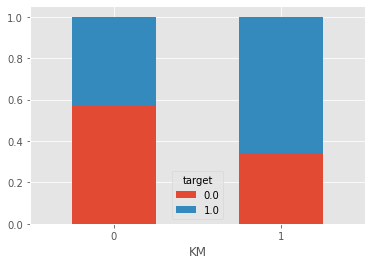

In [69]:
plot = pd.crosstab(index=data['KM'], columns=data['target'], normalize = 'index').plot(kind = 'bar', stacked = True, rot = 0)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


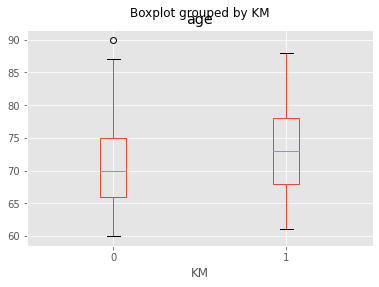

In [70]:
data.boxplot(column='age',by='KM')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


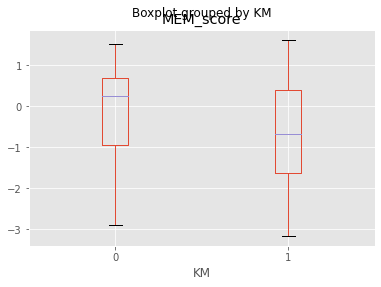

In [71]:
data.boxplot(column='MEM_score',by='KM')

# Clustering - Hierachical, ward

In [72]:
cl_w = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cl_w.fit(dat_cluster)

AgglomerativeClustering()

In [73]:
labelsWard = pd.Series(cl_w.labels_)
labelsWard.value_counts()

0    386
1     84
dtype: int64

In [74]:
data['ward'] = labelsWard.tolist()
pd.crosstab(index=data['ward'], columns=data['target'])

target,0.0,1.0
ward,,
0,177,209
1,41,43


In [75]:
pd.crosstab(index=data['ward'], columns=data['target'], normalize = 'index')

target,0.0,1.0
ward,,
0,0.458549,0.541451
1,0.488095,0.511905


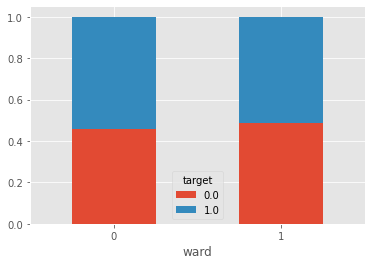

In [76]:
plot = pd.crosstab(index=data['ward'], columns=data['target'], normalize = 'index').plot(kind = 'bar', stacked = True, rot = 0)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


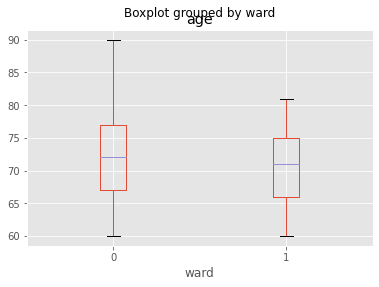

In [77]:
data.boxplot(column='age',by='ward')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


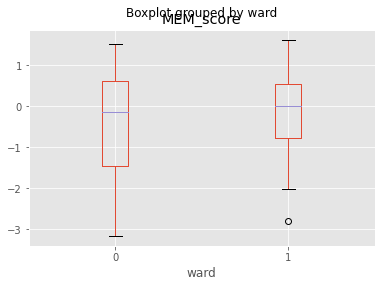

In [78]:
data.boxplot(column='MEM_score',by='ward')

# Clustering - Hierachical, average linkage

In [79]:
cl_ave = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')
cl_ave.fit(dat_cluster)

AgglomerativeClustering(linkage='average')

In [80]:
labelsAve = pd.Series(cl_ave.labels_)
labelsAve.value_counts()

0    469
1      1
dtype: int64

# PCA first, then clustering
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

Results quite similar to normal KMeans

In [81]:
pca_100 = PCA(n_components=100, random_state=123) # random state: reproducible results if randomization is used
pca_100.fit(dat_cluster)

PCA(n_components=100, random_state=123)

In [82]:
dat_pca = pca_100.transform(dat_cluster)
dat_pca.shape

(470, 100)

In [83]:
cl_km_pca = KMeans(n_clusters=2)
cl_km_pca.fit(dat_pca)

KMeans(n_clusters=2)

In [84]:
labelsKM_pca = pd.Series(cl_km_pca.labels_)
labelsKM_pca.value_counts()

1    243
0    227
dtype: int64

In [85]:
data['KM_pca'] = labelsKM_pca.tolist()
pd.crosstab(index=data['KM_pca'], columns=data['target'])

target,0.0,1.0
KM_pca,,
0,80,147
1,138,105


In [86]:
pd.crosstab(index=data['KM_pca'], columns=data['target'], normalize = 'index') # very similar to normal k Means

target,0.0,1.0
KM_pca,,
0,0.352423,0.647577
1,0.567901,0.432099


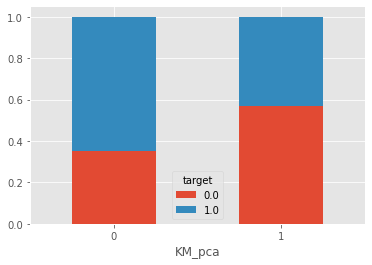

In [87]:
pd.crosstab(index=data['KM_pca'], columns=data['target'], normalize = 'index').plot(kind = 'bar', stacked = True, rot = 0)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


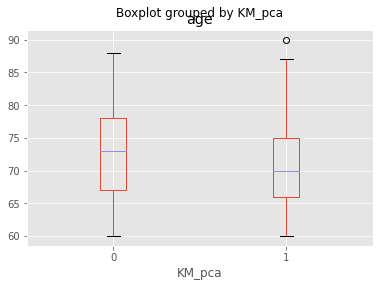

In [88]:
data.boxplot(column='age',by='KM_pca')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


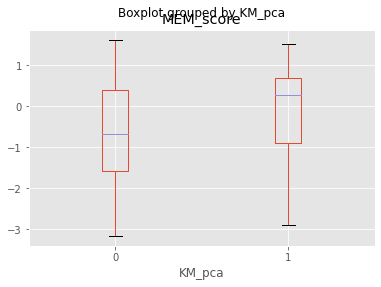

In [89]:
data.boxplot(column='MEM_score',by='KM_pca')

#  PCA visualisation

[0.04360132 0.03801912 0.02675731 0.02103484 0.01727035 0.01396124
 0.01279693 0.01161642 0.01105334 0.01055845 0.00938619 0.00875327
 0.00856531 0.00823441 0.00782686 0.00745088 0.00728022 0.00716748
 0.00668453 0.00646631 0.0064532  0.00611929 0.00589403 0.00575535
 0.00563465 0.00535051 0.00522899 0.00511609 0.00497343 0.00484791
 0.00472187 0.00454673 0.00447579 0.00439504 0.00431711 0.00422761
 0.00415428 0.00412015 0.00397915 0.00390281 0.00387773 0.00385738
 0.0037865  0.00367843 0.00363408 0.00359836 0.00355502 0.00351644
 0.00350082 0.00346263 0.00340157 0.0033813  0.00330704 0.00326518
 0.0032346  0.00318316 0.00316867 0.00314046 0.00307972 0.00303035
 0.00297105 0.00296007 0.00292863 0.00291457 0.00285369 0.00282234
 0.0028121  0.00279189 0.00277939 0.00274714 0.00273148 0.0027284
 0.00267483 0.00265504 0.0026197  0.00258301 0.00255834 0.00254012
 0.00251254 0.00249814 0.00245386 0.00243326 0.00241466 0.00239133
 0.00236194 0.00233503 0.00232902 0.00230197 0.00227806 0.00226

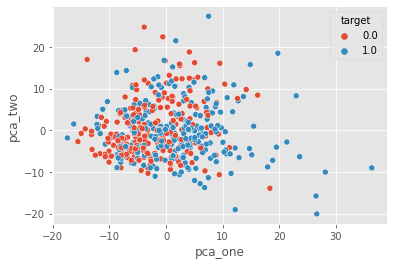

In [90]:
print(pca_100.explained_variance_ratio_)

data['pca_one'] = dat_pca[:, 0]
data['pca_two'] = dat_pca[:, 1]

sns.scatterplot(
    x = "pca_one", y = "pca_two",
    hue = "target",
    data = data
)


# t-SNE
On PCA results

https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
("It is highly recommended to use another dimensionality reduction method (e.g. PCA for dense data or TruncatedSVD for sparse data) to reduce the number of dimensions to a reasonable amount (e.g. 50) if the number of features is very high.")

In [91]:
tsne2 = TSNE(n_components=2, perplexity=30)
tsne2_results = tsne2.fit_transform(dat_pca)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [92]:
tsne2_results.shape

(470, 2)

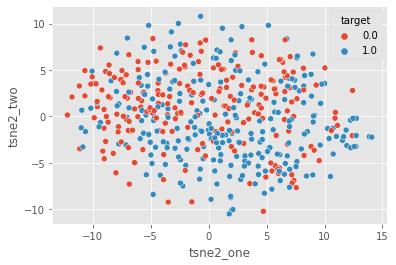

In [93]:
data['tsne2_one'] = tsne2_results[:, 0]
data['tsne2_two'] = tsne2_results[:, 1]

sns.scatterplot(
    x = "tsne2_one", y = "tsne2_two",
    hue = "target",
    data = data
)


In [94]:
cl_km_tsne = KMeans(n_clusters=2)
cl_km_tsne.fit(tsne2_results)

KMeans(n_clusters=2)

In [95]:
labelsKM_tsne = pd.Series(cl_km_tsne.labels_)
print(labelsKM_tsne.value_counts())
data['KM_tsne'] = labelsKM_tsne.tolist()
print(pd.crosstab(index=data['KM_tsne'], columns=data['target']))
print(pd.crosstab(index=data['KM_tsne'], columns=data['target'], normalize = 'index')) 

1    240
0    230
dtype: int64
target   0.0  1.0
KM_tsne          
0        125  105
1         93  147
target        0.0       1.0
KM_tsne                    
0        0.543478  0.456522
1        0.387500  0.612500


**different perplexity values:**

The perplexity is related to the number of nearest neighbors that is used in other manifold learning algorithms. Larger datasets usually require a larger perplexity. Consider selecting a value between 5 and 50. Different values can result in significantly different results. https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

In [96]:
tsne2 = TSNE(n_components=2, perplexity=5)
tsne2_results = tsne2.fit_transform(dat_pca)
cl_km_tsne = KMeans(n_clusters=2)
cl_km_tsne.fit(tsne2_results)
labelsKM_tsne = pd.Series(cl_km_tsne.labels_)
print(labelsKM_tsne.value_counts())
data['KM_tsne'] = labelsKM_tsne.tolist()
print(pd.crosstab(index=data['KM_tsne'], columns=data['target']))
print(pd.crosstab(index=data['KM_tsne'], columns=data['target'], normalize = 'index'))

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


0    240
1    230
dtype: int64
target   0.0  1.0
KM_tsne          
0         96  144
1        122  108
target        0.0       1.0
KM_tsne                    
0        0.400000  0.600000
1        0.530435  0.469565


In [97]:
tsne2 = TSNE(n_components=2, perplexity=50)
tsne2_results = tsne2.fit_transform(dat_pca)
cl_km_tsne = KMeans(n_clusters=2)
cl_km_tsne.fit(tsne2_results)
labelsKM_tsne = pd.Series(cl_km_tsne.labels_)
print(labelsKM_tsne.value_counts())
data['KM_tsne'] = labelsKM_tsne.tolist()
print(pd.crosstab(index=data['KM_tsne'], columns=data['target']))
print(pd.crosstab(index=data['KM_tsne'], columns=data['target'], normalize = 'index'))

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


0    240
1    230
dtype: int64
target   0.0  1.0
KM_tsne          
0        134  106
1         84  146
target        0.0       1.0
KM_tsne                    
0        0.558333  0.441667
1        0.365217  0.634783


In [98]:
tsne2 = TSNE(n_components=2, perplexity=20)
tsne2_results = tsne2.fit_transform(dat_pca)
cl_km_tsne = KMeans(n_clusters=2)
cl_km_tsne.fit(tsne2_results)
labelsKM_tsne = pd.Series(cl_km_tsne.labels_)
print(labelsKM_tsne.value_counts())
data['KM_tsne'] = labelsKM_tsne.tolist()
print(pd.crosstab(index=data['KM_tsne'], columns=data['target']))
print(pd.crosstab(index=data['KM_tsne'], columns=data['target'], normalize = 'index'))

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


1    245
0    225
dtype: int64
target   0.0  1.0
KM_tsne          
0        128   97
1         90  155
target        0.0       1.0
KM_tsne                    
0        0.568889  0.431111
1        0.367347  0.632653


In [99]:
tsne2 = TSNE(n_components=2, perplexity=40)
tsne2_results = tsne2.fit_transform(dat_pca)
cl_km_tsne = KMeans(n_clusters=2)
cl_km_tsne.fit(tsne2_results)
labelsKM_tsne = pd.Series(cl_km_tsne.labels_)
print(labelsKM_tsne.value_counts())
data['KM_tsne'] = labelsKM_tsne.tolist()
print(pd.crosstab(index=data['KM_tsne'], columns=data['target']))
print(pd.crosstab(index=data['KM_tsne'], columns=data['target'], normalize = 'index'))

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


0    252
1    218
dtype: int64
target   0.0  1.0
KM_tsne          
0        142  110
1         76  142
target        0.0       1.0
KM_tsne                    
0        0.563492  0.436508
1        0.348624  0.651376


ggf Automatisierung implementieren, für verschiedene #components PCA und perplexity Werte und n_components